In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('hindi.txt', 'r').read().splitlines()
print(len(words))
print(max(len(w) for w in words))
print(words[:8])

2845
54381
['पीटर लीवर जन्म सितंबर टोडमॉर्डन यॉर्कशायर इंग्लैंड एक पूर्व अंग्रेजी क्रिकेटर हैं जो से तक सत्रह टेस्ट और इंग्लैंड के लिए दस वनडे खेले। वह एक सफल विकेट लेने वाला खिलाड़ी था जिसने सत्रह टेस्ट मैचों में शिकार किए और रन के सर्वोच्च स्कोर के साथ एक आसान बल्लेबाज था। अपने करियर के अंत में न्यूजीलैंड के खिलाफ एक टेस्ट मैच के दौरान उन्होंने बाउंसर से डेब्यू करने वाले इवेन चैटफील्ड को लगभग मार डाला। सन्दर्भ श्रेणीइंग्लैंड के क्रिकेट खिलाड़ी श्रेणीइंग्लैंड के वनडे क्रिकेट खिलाड़ी श्रेणीजीवित लोग श्रेणी में जन्मे लोग', 'यह गुफा शिवपुर के निकट अम्बिकापुर से एक घण्टे की दूरी पर है इसमें अनेक प्राचीन मूर्तियां हैं इसमें महान नामक एक नदी का पानी निकलता रहता है वहीं इस नदी का उद्गम भी है इस गुफा का दूसरा छोर महामाया मंदिर के निकट निकलता है', 'प्रगतिशील कर्मिक और कृषक संघ सूरीनाम का एक राजनैतिक दल है। पिछ्ले विधायी चुनावों २५ मई २००५ में इसे १० मत मिले थे और राष्ट्रीय विधानसभा की किसी भी सीट पर विजय प्राप्त नहीं हुई। बाहरी कड़ियाँ सूरीनाम के राजनैतिक दल। श्रेणीसूरीनाम के राजनैतिक दल', 'बै

In [3]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: ' ', 2: 'ँ', 3: 'ं', 4: 'ः', 5: 'अ', 6: 'आ', 7: 'इ', 8: 'ई', 9: 'उ', 10: 'ऊ', 11: 'ऋ', 12: 'ऍ', 13: 'ऎ', 14: 'ए', 15: 'ऐ', 16: 'ऑ', 17: 'ऒ', 18: 'ओ', 19: 'औ', 20: 'क', 21: 'ख', 22: 'ग', 23: 'घ', 24: 'ङ', 25: 'च', 26: 'छ', 27: 'ज', 28: 'झ', 29: 'ञ', 30: 'ट', 31: 'ठ', 32: 'ड', 33: 'ढ', 34: 'ण', 35: 'त', 36: 'थ', 37: 'द', 38: 'ध', 39: 'न', 40: 'ऩ', 41: 'प', 42: 'फ', 43: 'ब', 44: 'भ', 45: 'म', 46: 'य', 47: 'र', 48: 'ऱ', 49: 'ल', 50: 'ळ', 51: 'ऴ', 52: 'व', 53: 'श', 54: 'ष', 55: 'स', 56: 'ह', 57: '़', 58: 'ऽ', 59: 'ा', 60: 'ि', 61: 'ी', 62: 'ु', 63: 'ू', 64: 'ृ', 65: 'ॄ', 66: 'ॅ', 67: 'ॆ', 68: 'े', 69: 'ै', 70: 'ॉ', 71: 'ॊ', 72: 'ो', 73: 'ौ', 74: '्', 75: 'ॐ', 76: '॑', 77: '॒', 78: '॓', 79: '॔', 80: 'ॠ', 81: '।', 82: '॥', 83: '०', 84: '१', 85: '२', 86: '३', 87: '४', 88: '५', 89: '६', 90: '७', 91: '८', 92: '९', 93: '॰', 0: '.'}
94


In [4]:
# shuffle up the words
import random
random.seed(42)
random.shuffle(words)

In [5]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([2972828, 3]) torch.Size([2972828])
torch.Size([412615, 3]) torch.Size([412615])
torch.Size([334578, 3]) torch.Size([334578])


In [6]:
for x,y in zip(Xtr[:20], Ytr[:20]):
  print(''.join(itos[ix.item()] for ix in x), '-->', itos[y.item()])

... --> क
..क --> ु
.कु --> श
कुश --> ी
ुशी -->  
शी  --> स
ी स --> न
 सन --> ्
सन् -->  
न्  --> क
् क --> ी
 की -->  
की  --> भ
ी भ --> ा
 भा --> र
भार --> त
ारत --> ी
रती --> य
तीय -->  
ीय  --> क


In [7]:
# Near copy paste of the layers we have developed in Part 3

# -----------------------------------------------------------------------------------------------
class Linear:
  
  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5 # note: kaiming init
    self.bias = torch.zeros(fan_out) if bias else None
  
  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out
  
  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# -----------------------------------------------------------------------------------------------

class BatchNorm1d:
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    # if self.training:
    #   if x.ndim == 2:
    #     dim = 0
    #   elif x.ndim == 3:
    #     dim = (0,1)
    #   xmean = x.mean(dim, keepdim=True) # batch mean
    #   xvar = x.var(dim, keepdim=True) # batch variance
    # else:
    #   xmean = self.running_mean
    #   xvar = self.running_var
    # xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    # self.out = self.gamma * xhat + self.beta
    if self.training:
      xmean =x.mean(0 , keepdim=True) #batch mean
      xvar =x.var(0,keepdim=True) #batch variance
    else:
      xmean =self.running_mean
      xvar = self.running_var
    xhat =(x-xmean)/torch.sqrt(xvar +self.eps) #normailze to get unit variance
    self.out =self.gamma *xhat +self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out
  
  def parameters(self):
    return [self.gamma, self.beta]

# -----------------------------------------------------------------------------------------------
class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []


In [8]:
torch.manual_seed(42); # seed rng for reproducibility

In [9]:
# original network
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP
C=torch.randn((vocab_size,n_embd))
layers =[
  Linear(n_embd*block_size,n_hidden,bias=False),BatchNorm1d(n_hidden),Tanh(),
  Linear(n_hidden,vocab_size),
]
# model = Sequential([
#   Embedding(vocab_size, n_embd),
#   FlattenConsecutive(8), Linear(n_embd * 8, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(n_hidden, vocab_size),
# ])

# hierarchical network
# n_embd = 24 # the dimensionality of the character embedding vectors
# n_hidden = 128 # the number of neurons in the hidden layer of the MLP
# model = Sequential([
#   Embedding(vocab_size, n_embd),
#   FlattenConsecutive(2), Linear(n_embd * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(n_hidden, vocab_size),
# ])

# parameter init
with torch.no_grad():
  layers[-1].weight *= 0.1 # last layer make less confident

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

26234


In [10]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
  
  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x=layer(x)
  loss =F.cross_entropy(x,Yb) #loss function
  #backward pass
  for p in parameters:
    p.grad=None
  loss.backward()
  # update
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 4.5472
  10000/ 200000: 2.1161
  20000/ 200000: 2.7569
  30000/ 200000: 2.2446
  40000/ 200000: 2.3785
  50000/ 200000: 2.3498
  60000/ 200000: 2.1531
  70000/ 200000: 2.2194
  80000/ 200000: 1.7893
  90000/ 200000: 2.1616
 100000/ 200000: 2.4116
 110000/ 200000: 2.4792
 120000/ 200000: 1.9201
 130000/ 200000: 1.8912
 140000/ 200000: 2.0006
 150000/ 200000: 1.8484
 160000/ 200000: 2.4590
 170000/ 200000: 2.2547
 180000/ 200000: 2.5327
 190000/ 200000: 2.1863


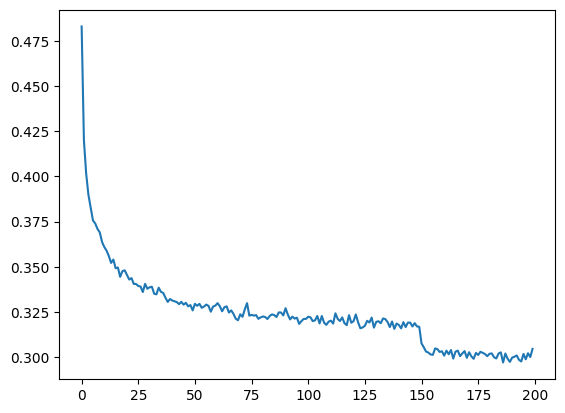

In [11]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [12]:
for layer in layers:
    layer.training =False

In [13]:
# @torch.no_grad() # this decorator disables gradient tracking
# def split_loss(split):
#   x,y = {
#     'train': (Xtr, Ytr),
#     'val': (Xdev, Ydev),
#     'test': (Xte, Yte),
#   }[split]
#   emb = C[x] # (N, block_size, n_embd)
#   x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
#   for layer in layers:
#     x=layer(x)

#   loss=F.cross_entropy(x,y)
#   print(split ,loss.item())

# split_loss('train')
# split_loss('val')

In [1]:
# sample from the model
for _ in range(10):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb =C[torch.tensor([context])]
        x =emb.view(emb.shape[0] ,-1)
        for layer in layers:
            x=layer(x)
        logits=x
        probs =F.softmax(logits,dim=1)
        #sample from the distribution
        ix =torch.multinomial(probs ,num_samples= 1).item()
        context =context[1:] +[ix]
        out.append(ix)
        if ix==0:
            break

     
    
    print(''.join(itos[i] for i in out)) # decode and print the generated word

NameError: name 'block_size' is not defined